In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

# 1. Descriptive Statistics 

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:

A. Apakah ada kolom dengan tipe data kurang sesuai?
> Semua tipe data sudah sesuai

B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
> tidak ada

C. Apakah ada kolom yang isi nilainya tidak sesuai?
(contoh: kolom Name tapi isinya tanggal lahir)
> tidak ada

D. Apakah ada kolom yang memiliki nilai summary agak aneh?
(min/mean/median/max/unique/top/freq)
> tidak ada

* Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah, misal untuk A: “Semua tipe data sudah sesuai” 

In [2]:
df = pd.read_csv('health_insurance_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
nums=['Age', 'Region_Code','Annual_Premium','Vintage']
cats=['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [4]:
df.duplicated().values.any()

False

In [7]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
df[cats].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


# 2. Univariate Analysis

- Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). 

- Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). 

>>Skewed positif: Age
>>Bimodal: Age 
>>Outlier: Annual Premium
>>Nilai yang mendominasi: Driving License
>>Kategori terlalu banyak: id, Region Code, Vintage, Annual Premium, >>Policy Sales Channel


- Jelaskan juga apa yang harus di-follow up saat data pre-processing.
 > drop kolom id dan Vintage
 > ubah tipe data gender, vehicle damage, vehicle age menjadi numeric

<Figure size 576x432 with 0 Axes>

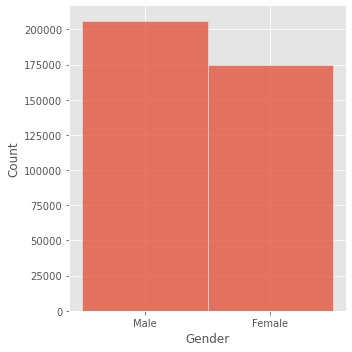

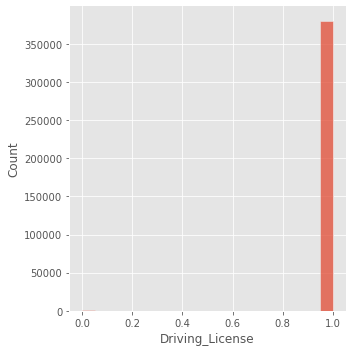

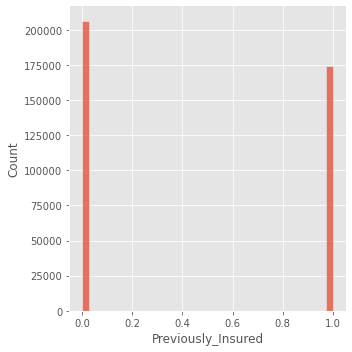

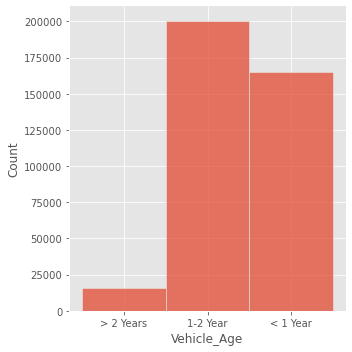

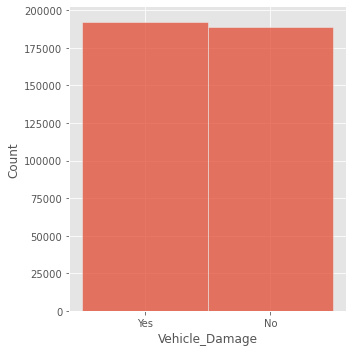

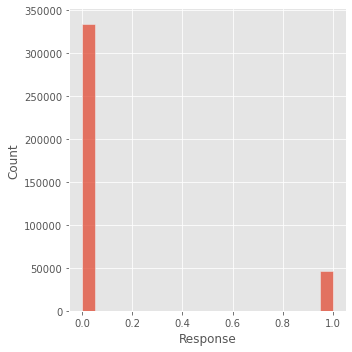

In [10]:
#Univariate Category

fig = plt.figure(figsize=[8,6])
data_rating = cats
for i in range(0, len(data_rating)):
    sns.displot(data=df[data_rating[i]])

<Figure size 576x432 with 0 Axes>

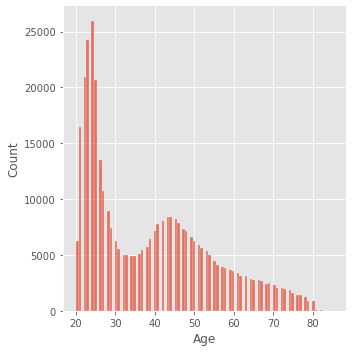

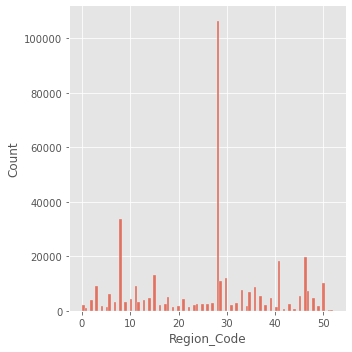

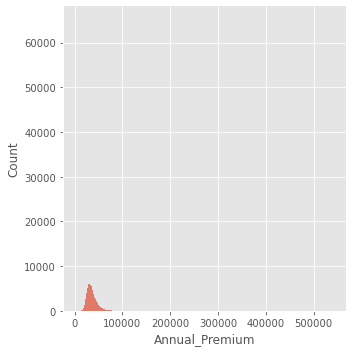

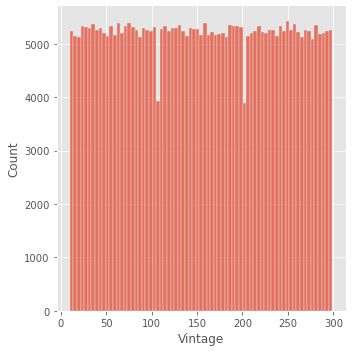

In [11]:
#Univariate Numerical

fig = plt.figure(figsize=[8,6])
data_rating = nums
for i in range(0, len(data_rating)):
    sns.displot(data=df[data_rating[i]])

<AxesSubplot:ylabel='Annual_Premium'>

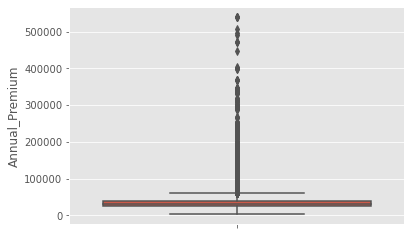

In [10]:
# ANNUAL PREMIUM (Outlier)

sns.boxplot(y = 'Annual_Premium', data = df)

/Users/keiziapurba/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

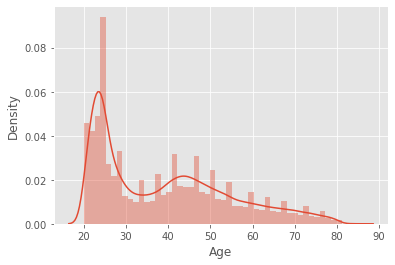

In [27]:
# AGE (Skewed & Bimodal)

sns.distplot(df.Age)

<AxesSubplot:xlabel='Response', ylabel='count'>

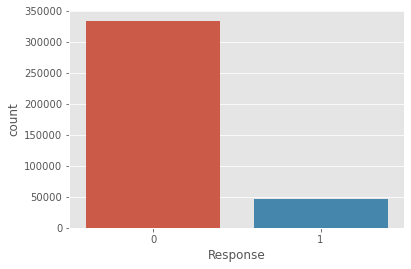

In [4]:
# RESPONSE

sns.countplot(x=df['Response'])

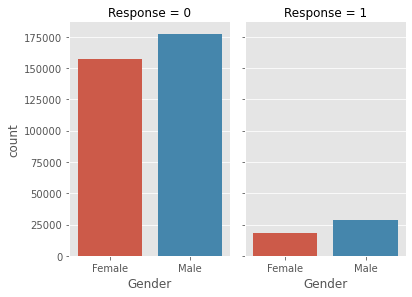

In [11]:
# GENDER & RESPONSE

df = df.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
gr = sns.catplot(x='Gender', y='count',col='Response',
                data=df, kind='bar',
                height=4, aspect=.7)

In [4]:
# RESPONSE & VEHICLE AGE

df = df.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


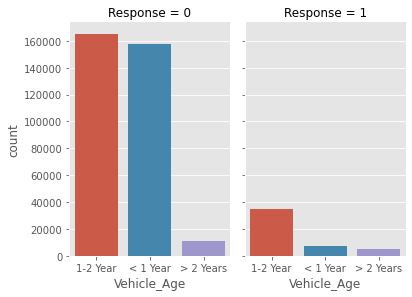

In [5]:
# RESPONSE & VEHICLE AGE  

var = sns.catplot(x='Vehicle_Age', y='count',col='Response',
                data=df, kind='bar',
                height=4, aspect=.7)

In [3]:
# RESPONSE & VEHICLE DAMAGE

df = df.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


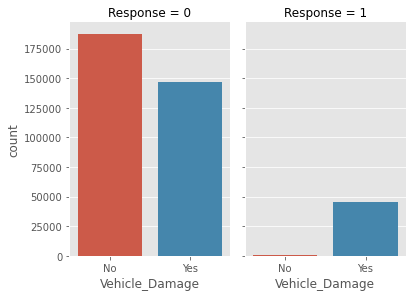

In [5]:
# RESPONSE & VEHICLE DAMAGE

vdr = sns.catplot(x='Vehicle_Damage', y='count',col='Response',
                  data=df, kind='bar',
                  height=4, aspect=.7)

In [3]:
# Previously Insured & Response

df = df.groupby(['Previously_Insured','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Previously_Insured,Response,count
0,0,0,159929
1,0,1,46552
2,1,0,174470
3,1,1,158


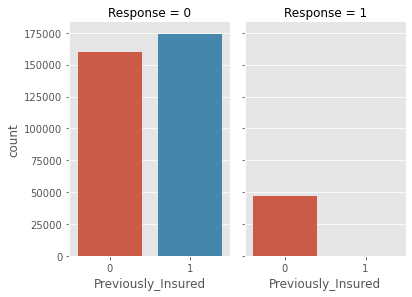

In [4]:
# Previously Insured & Response

pir = sns.catplot(x='Previously_Insured', y='count',col='Response',
                  data=df, kind='bar',
                  height=4, aspect=.7)

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='Previously_Insured'>

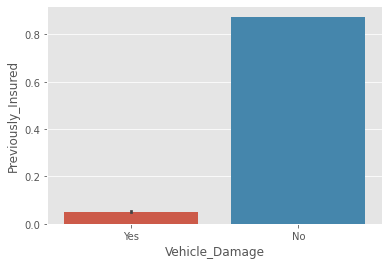

In [3]:
#Vehicle Damage & Previously Insured

sns.barplot(y= 'Previously_Insured', x='Vehicle_Damage', data=df)

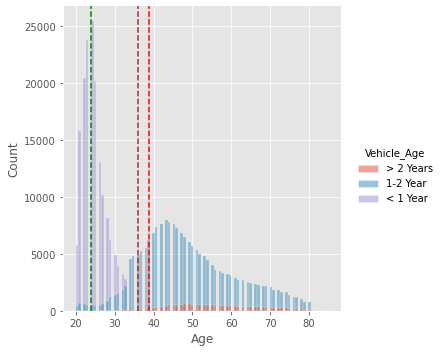

In [8]:
#Vehicle Age & Age

sns.displot(x= 'Age', hue='Vehicle_Age', data=df)


meanX = df['Age'].mean()
medianX = df['Age'].median()
modeX = df['Age'].mode()[0]

plt.axvline(meanX, color = 'red', linestyle = '--', label = 'Mean')
plt.axvline(medianX, color = 'brown', linestyle = '--', label = 'Median')
plt.axvline(modeX, color = 'green', linestyle = '--', label = 'Mode')

In [9]:
df['Age'].median()

36.0

In [10]:
 df['Age'].mode()[0]

24

# 3. Multivariate Analysis

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:

A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?

> Secara keseluruhan korelasi antar feature rendah. Namun, terdapat 5 fitur yang relevan dengan fitur response, yakni: 
>>1. Response - Vehicle Damage (0.35)
>>2. Response - Previously Insured (0.34) 
>>3. Response - Vehicle Age (0.22)
>>4. Response - Policy Sales Channel (0.14)
>>5. Response - Age (0.11)




B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?
> Secara keseluruhan korelasi antar feature rendah. Feature yang menarik adalah korelasi antar fitur Response dan Vehicle Damage. Kita akan melakukan One Hot Encoding terhadap fitur-fitur tersebut, yang dimana diharapkan dapat menghasilkan performance yang sesuai dengan ekspetasi.



* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi 

In [20]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,YoungAge
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,OldAge
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,MiddleAge
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,YoungAge
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,YoungAge


In [3]:
df.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [14]:
df['Gender2'] = np.where(df['Gender']=='Female', 1, 0)
df['VA2'] = np.where(df['Vehicle_Age']=='> 2 Years', 2,
                    np.where(df['Vehicle_Age']=='1-2 Year', 1, 0))
df['VD2'] = np.where(df['Vehicle_Damage']=='Yes', 1, 0)

df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender2,VA2,VD2
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,0,2,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,0,1,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,0,2,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,0,1,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,0,0,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,0,0,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,1,2,1


In [5]:
d = df.drop(columns=['id', 'Vintage'])
d

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response,Gender2,VA2,VD2
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,1,0,2,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,0,0,1,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,1,0,2,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,0,0,0,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,0,0,1,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,0,0,0,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,0,0,0,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,0,1,2,1


<AxesSubplot:>

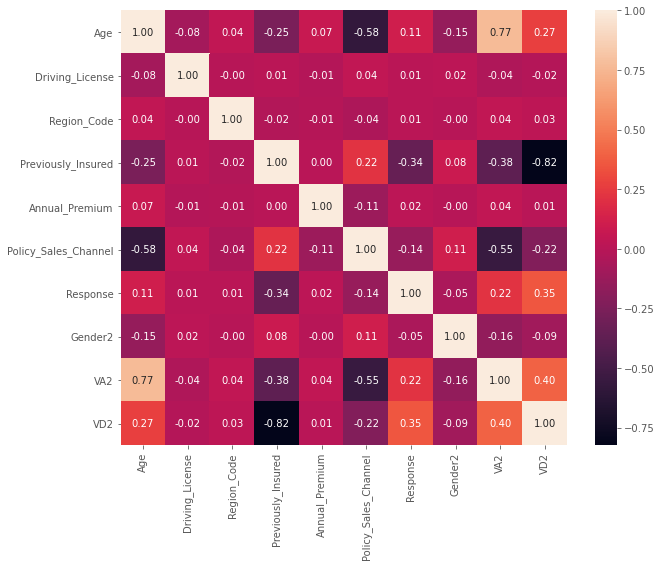

In [6]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(d.corr(), annot=True, fmt='.2f')

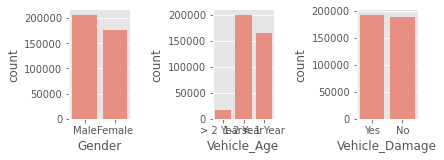

In [33]:
#CATEGORY PLOT

for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(x = df[cats[i]], color='black', orient='v')
    plt.tight_layout()

# 4. Business Insight

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. 
- Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis.

> Existing customers (Previuosly Insured) yang telah memiliki asuransi kendaraan sebanyak 174628 customers. Customers yang belum memiliki asuransi kendaraan dan tertarik untuk memiliki asuransi kendaraan sebesar 46552 customer.
> Berdasarkan distribusi usia customer dan usia kendaraan, usia 24 adalah usia yang paling dominan memiliki kendaraan dengan usia kendaraan kurang dari 1 tahun.